1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [5]:
import numpy as np
import math
import scipy.stats as st

In [3]:
def poisson(Lambda, k):
  return Lambda**k * np.e**(-Lambda) / math.factorial(k)

In [4]:
prob = 0
for i in range(15, 30):
  prob += poisson(Lambda=6.3, k=i)
print(prob)

0.002217122781787767

In [8]:
prob_base = 1 - st.norm.cdf(3)
print(prob_base)

0.0013498980316301035


Answer: Since prob >= prob_base, then it is significant.

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [12]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
x_bar_1 = np.mean(pre)
x_bar_2 = np.mean(post)
sigma_1 = np.std(pre)
sigma_2 = np.std(post)
sigma = ((sigma_1**2 + sigma_2**2) / 2)**0.5
T = abs((x_bar_1 - x_bar_2) / (sigma * (np.sqrt(2/len(pre)))))
T

3.991846326292112

In [18]:
t_crit = st.t.ppf(q=0.975, df=len(pre)+len(post)-1)
t_crit

2.093024054408263

Answer: Since T >= t_crit, then the change is significant.

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

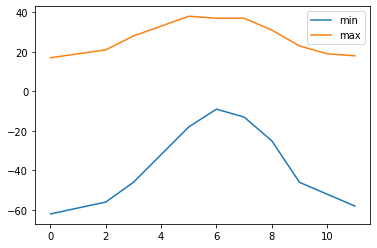

In [22]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
max_t = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_t = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
t = [i for i in range(0, len(max_t))]

plt.plot(t, min_t)
plt.plot(t, max_t)
plt.legend(['min', 'max'])
plt.show()

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


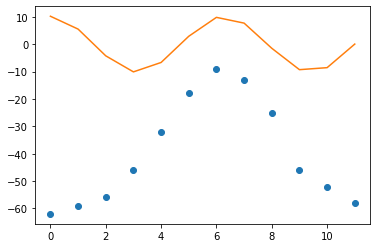

In [32]:
def cos_func(x, D, E):
    y = D*np.cos(int(E)*x)
    return y
parameters, covariance = curve_fit(f=cos_func, xdata=t, ydata=min_t)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(t, fit_D, fit_E)

plt.plot(t, min_t, 'o', label='data')
plt.plot(t, fit_cosine, '-', label='fit')
plt.show()

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


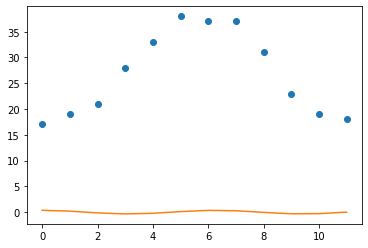

In [33]:
def cos_func(x, D, E):
    y = D*np.cos(int(E)*x)
    return y
parameters, covariance = curve_fit(f=cos_func, xdata=t, ydata=max_t)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(t, fit_D, fit_E)

plt.plot(t, max_t, 'o', label='data')
plt.plot(t, fit_cosine, '-', label='fit')
plt.show()

/usr/local/lib/python3.8/dist-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


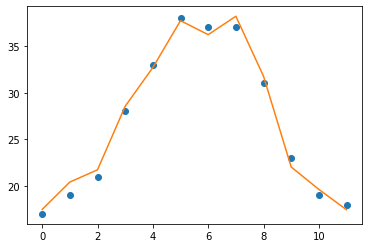

In [45]:
guess = [10, 0.7]
parameters, covariance = curve_fit(f=cos_func, xdata=t, ydata=max_t, p0=guess)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(t, fit_D, fit_E)
plt.plot(t, max_t, 'o', label='data')
plt.plot(t, fit_cosine, '-', label='fit')
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [46]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-01-17 23:09:49--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-01-17 23:09:49--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9a3533b9d1c8b144e537f9ef2f.dl.dropboxusercontent.com/cd/0/inline/B0y3mvxTU15HdIIIGOG0_iVhfsYwxnSPQKkoOu0Ypuu4i07EeR2HFqXs-vv6zU79NFwFL15dUkU9f_iIqCjfN_KmsqtKCJHQSX2H2-3x2T0ZUBXo5y1F-d4MoNvjcL7CMiqYfx4n2WhYfPNnnps-VurE_54ABP2pyepy2YZf8RbHng/file# [following]
--2023-01-17 23:09:50--  https://uc9a3533b9d1c8b144e537f9ef2f.dl.dropboxusercontent.com/cd/0/inline/B0y3mvxTU15HdIIIGOG0_iVhfsYwxnSPQKkoOu0Ypuu4i07EeR2HFqXs-vv6zU79N

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [47]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-01-17 23:10:40--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-17 23:10:41--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb22abecc95ebaff407194895d5.dl.dropboxusercontent.com/cd/0/inline/B0wdc-qDW2n4A7Am9XC36zkM_puk2lXOMcOZr_wdeq3r60BQLOtW6nQvN9bBotdLtXqxuhjGw0vSozI6JjjuqyE-rnnkb7Tt-bWs_47wVJaZW9PKeOutlanMn2htCtPHYlx_uVPU5hDpTvJcO1n6jrBeSoRKeIf-1yH-gp8IZBt6oA/file# [following]
--2023-01-17 23:10:41--  https://ucb22abecc95ebaff407194895d5.dl.dropboxuserconte

In [52]:
import pandas as pd
df = pd.read_csv("/content/munich_temperatures_average_with_bad_data.txt", delimiter=" ")
df.columns = ['c1', 'c2']

In [53]:
df

,c1,c2
0,1995.00548,-1.61111
1,1995.00821,-3.55556
2,1995.01095,-9.83333
3,1995.01369,-10.22220
4,1995.01643,-9.50000
...,...,...
6673,2013.27379,7.33333
6674,2013.27652,10.00000
6675,2013.27926,10.55560
6676,2013.28200,8.94444


In [54]:
def function(a, b, c):
    return a*np.cos(2*np.pi.t+b) + c
parameters, covariance = curve_fit(f=cos_func, xdata=df['c1'], ydata=df['c2'])
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = function(t, fit_D, fit_E)

plt.plot(t, max_t, 'o', label='data')
plt.plot(t, fit_cosine, '-', label='fit')
plt.show()

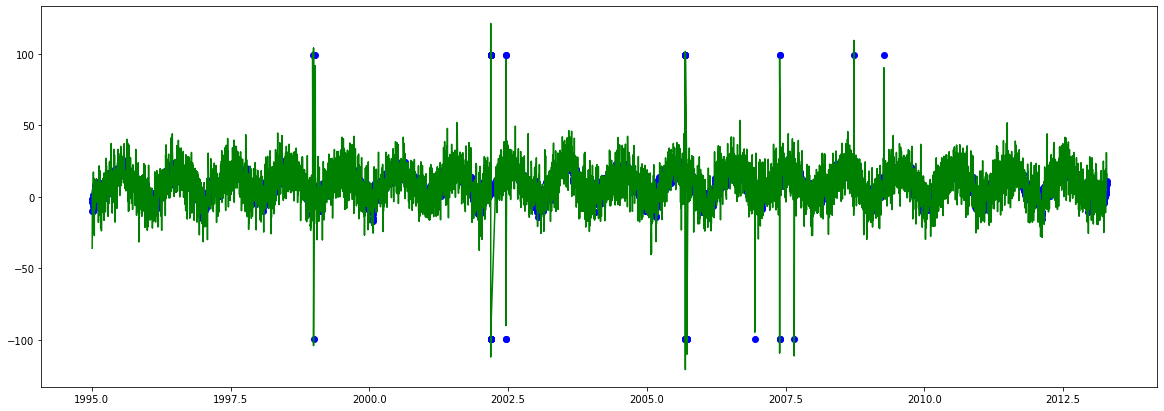

In [64]:
guess = [15, 1.45]
parameters, covariance = curve_fit(f=function, xdata=df['c1'], ydata=df['c1'], p0=guess)
fit_D = parameters[0]
fit_E = parameters[1]

fit_cosine = cos_func(t, fit_D, fit_E)
plt.plot(t, max_t, 'o', label='data')
plt.plot(t, fit_cosine, '-', label='fit')
plt.show()